<a href="https://colab.research.google.com/github/DiFve/Solar-radiation-data-analysis/blob/main/Prob_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install stemgraphic

     |████████████████████████████████| 61 kB 419 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import stemgraphic
import math
from datetime import datetime, date, time

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SolarPrediction.csv to SolarPrediction.csv


In [ ]:
# ! Import dataset
df  = pd.read_csv("./SolarPrediction.csv")

In [ ]:
# ! Clean not used data 

del df["UNIXTime"]
del df["Pressure"]
del df["WindDirection(Degrees)"]
del df["Speed"]
del df["TimeSunRise"]
del df["TimeSunSet"]
# df = df.drop(df.index[3500:],axis=0)
df['Time'] = pd.to_datetime(df['Time'])
df = df.loc[((df['Time'].dt.time >= time(9,00)) & (df['Time'].dt.time <= time(16,00)))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9483 entries, 96 to 32577
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         9483 non-null   object        
 1   Time         9483 non-null   datetime64[ns]
 2   Radiation    9483 non-null   float64       
 3   Temperature  9483 non-null   int64         
 4   Humidity     9483 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 444.5+ KB


In [ ]:
print(df["Radiation"].describe())
print(df["Temperature"].describe())
print(df["Humidity"].describe())

count    9483.000000
mean      600.645238
std       303.630898
min         8.520000
25%       335.555000
50%       650.480000
75%       855.380000
max      1601.260000
Name: Radiation, dtype: float64
count    9483.000000
mean       56.998840
std         5.578447
min        43.000000
25%        53.000000
50%        58.000000
75%        61.000000
max        71.000000
Name: Temperature, dtype: float64
count    9483.000000
mean       72.385532
std        25.266603
min        12.000000
25%        54.000000
50%        80.000000
75%        94.000000
max       103.000000
Name: Humidity, dtype: float64


In [ ]:
# ! For the reason that Data(Date) and Time are use for categorize another data
# ? we will only calculate avg, median, mode and standard deviation of the remaining three 
# ! Finding Mean(xbar) of each column
avg_radiation_wpm2 = df["Radiation"].mean()
avg_Temperature_Fahrenheit = df["Temperature"].mean()
avg_Relative_Humidity_percentage = df["Humidity"].mean()

print("Mean of radiation is : %.5f w/m^2" %avg_radiation_wpm2)
print("Mean of temperature is : %.5f °F" % avg_Temperature_Fahrenheit)
print("Mean of humidity is : %.5f "% avg_Relative_Humidity_percentage + "%" )\

Mean of radiation is : 600.64524 w/m^2
Mean of temperature is : 56.99884 °F
Mean of humidity is : 72.38553 %


In [ ]:
# ! Finding Mode of each column
mode_radiation_wpm2 = df["Radiation"].mode()
mode_Temperature_Fahrenheit = df["Temperature"].mode()
mode_Relative_Humidity_percentage = df["Humidity"].mode()

print("Mode of radiation is : " + str(mode_radiation_wpm2) + "w/m^2")
print("Mode of temperature is : %.5f °F" % mode_Temperature_Fahrenheit)
print("Mode of humidity is : %.5f "% mode_Relative_Humidity_percentage + "%" )


Mode of radiation is : 0      246.06
1      302.64
2      450.88
3      671.97
4      687.23
5      742.83
6      793.65
7      809.85
8      821.37
9      828.01
10     950.18
11    1028.58
dtype: float64w/m^2
Mode of temperature is : 58.00000 °F
Mode of humidity is : 93.00000 %


In [ ]:
# ! Finding Median(x tilde) of each column

med_radiation_wpm2 = df["Radiation"].median()
med_Temperature_Fahrenheit = df["Temperature"].median()
med_Relative_Humidity_percentage = df["Humidity"].median()

print("Med of radiation is : %.5f w/m^2" %med_radiation_wpm2)
print("Med of temperature is : %.5f °F" % med_Temperature_Fahrenheit)
print("Med of humidity is : %.5f "% med_Relative_Humidity_percentage + "%" )


Med of radiation is : 650.48000 w/m^2
Med of temperature is : 58.00000 °F
Med of humidity is : 80.00000 %


In [ ]:
# ! Finding SD of each column
# ? ddof in parameter is Delta Degree of Freedom which the divisor use. (N-ddof)

SD_radiation_wpm2 = df["Radiation"].std(ddof=1)
SD_Temperature_Fahrenheit = df["Temperature"].std(ddof=1)
SD_Relative_Humidity_percentage = df["Humidity"].std(ddof=1)

print("SD of radiation is : %.5f w/m^2" %SD_radiation_wpm2)
print("SD of temperature is : %.5f °F" % SD_Temperature_Fahrenheit)
print("SD of humidity is : %.5f "% SD_Relative_Humidity_percentage + "%" )

SD of radiation is : 303.63090 w/m^2
SD of temperature is : 5.57845 °F
SD of humidity is : 25.26660 %


Text(0, 0.5, 'Frequency of data')

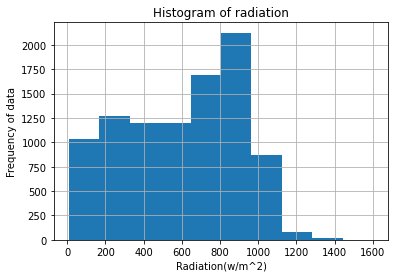

In [ ]:
# Make histogram of radiation
df['Radiation'].hist()
plt.title("Histogram of radiation")
plt.xlabel("Radiation(w/m^2)")
plt.ylabel("Frequency of data")

Text(0, 0.5, 'Frequency of data')

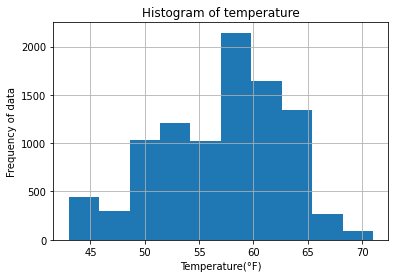

In [ ]:
# Make histogram of temperature
df['Temperature'].hist()
plt.title("Histogram of temperature")
plt.xlabel("Temperature(°F)")
plt.ylabel("Frequency of data")

Text(0, 0.5, 'Frequency of data')

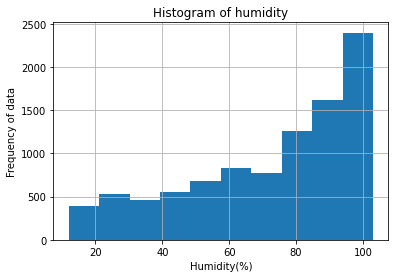

In [ ]:
# Make histogram of humidity
df['Humidity'].hist()
plt.title("Histogram of humidity")
plt.xlabel("Humidity(%)")
plt.ylabel("Frequency of data")

Text(0, 0.5, 'Frequency of data')

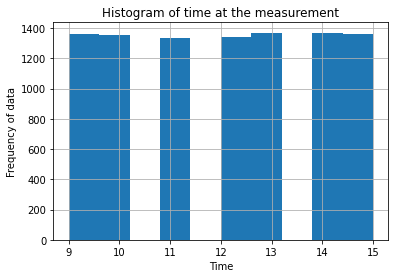

In [ ]:
# Make histogram of time
df['Time'].dt.hour.hist()
plt.title("Histogram of time at the measurement")
plt.xlabel("Time")
plt.ylabel("Frequency of data")

(<Figure size 540x2952 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f62ff629410>)

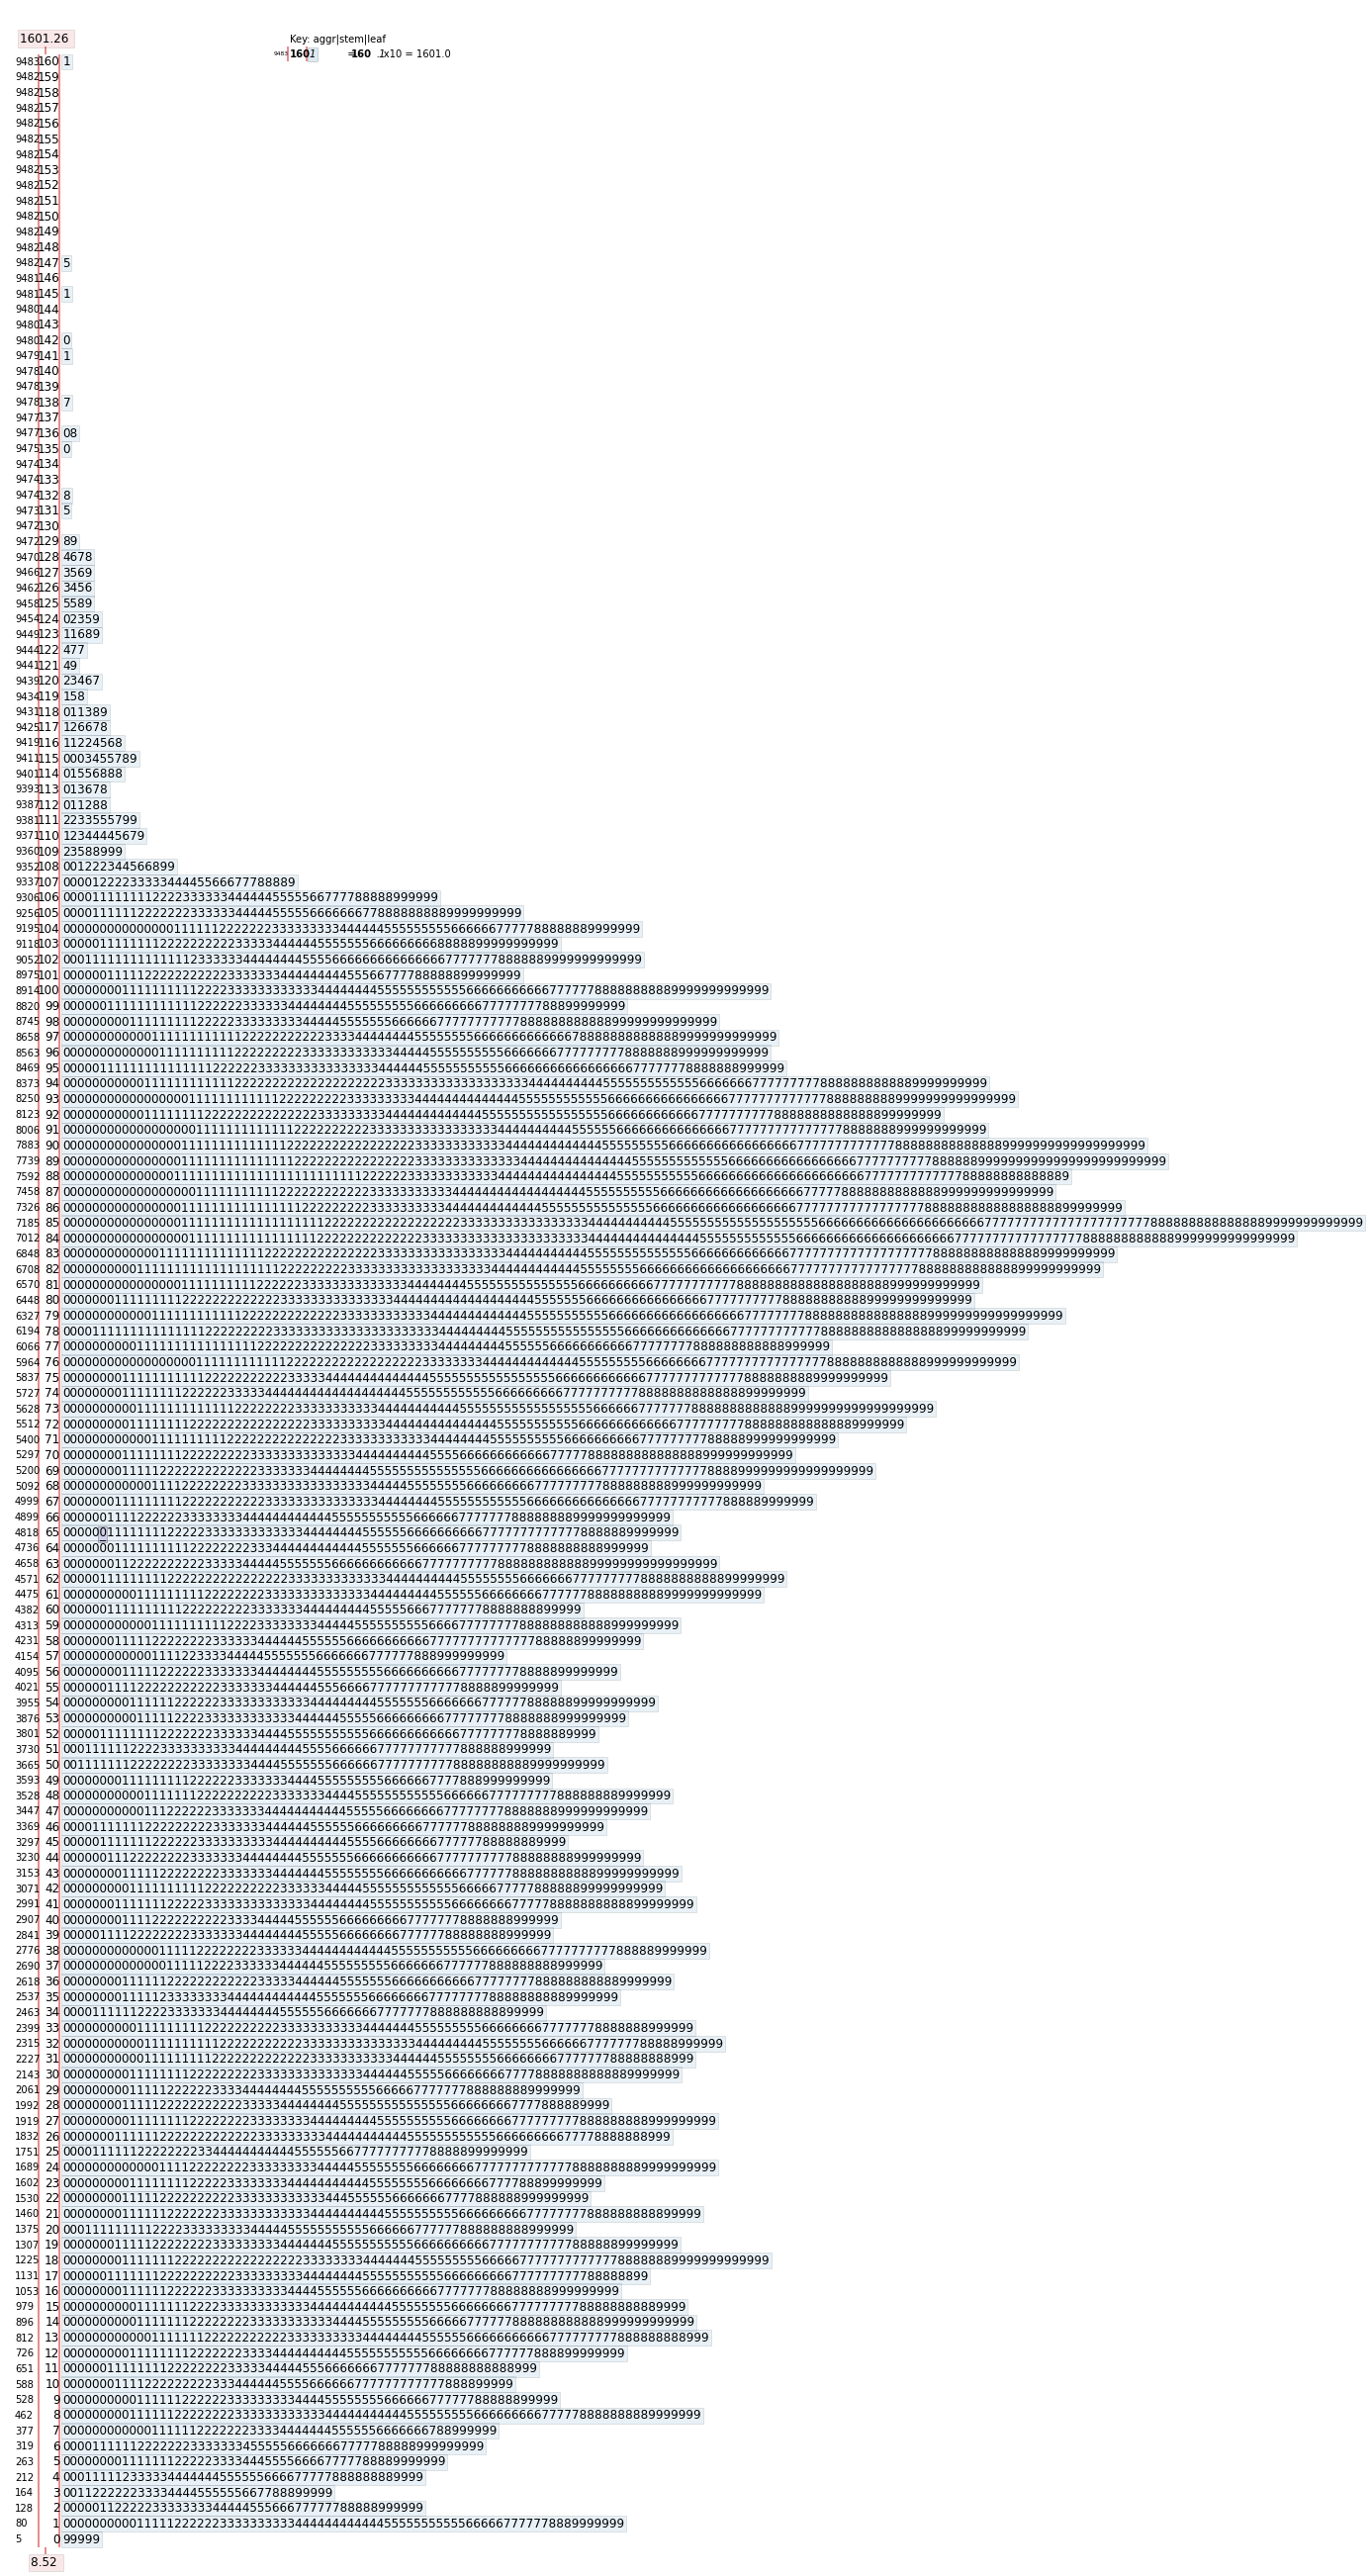

In [ ]:
# Make steam and leaf of radiation
stemgraphic.stem_graphic(df['Radiation'],scale = 10,display=9483)

(<Figure size 540x126 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f62ff037950>)

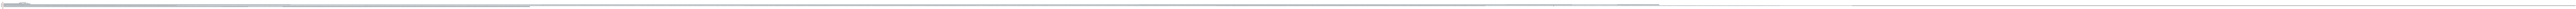

In [ ]:
# Make steam and leaf of temperature
stemgraphic.stem_graphic(df['Temperature'],scale = 10,display=9483)

(<Figure size 540x234 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f6301eec4d0>)

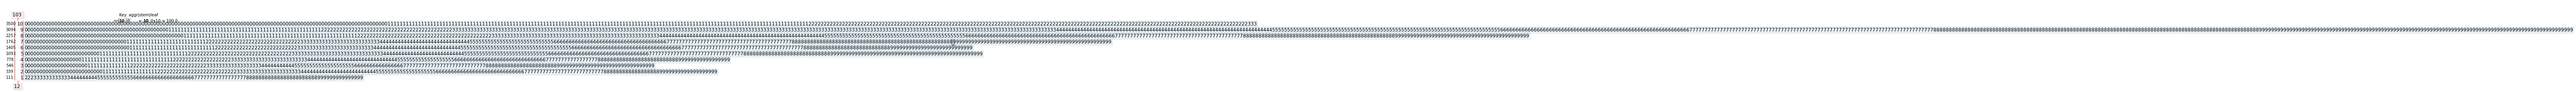

In [ ]:
# Make steam and leaf of humidty
stemgraphic.stem_graphic(df['Humidity'],scale = 10,display=3500)

43
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4125 entries, 96 to 32577
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         4125 non-null   object        
 1   Time         4125 non-null   datetime64[ns]
 2   Radiation    4125 non-null   float64       
 3   Temperature  4125 non-null   int64         
 4   Humidity     4125 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 193.4+ KB


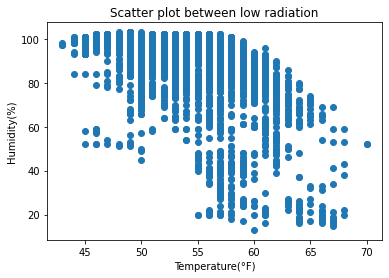

In [ ]:
# Make scatter plot of low radiation
df_low=df[df['Radiation'] <= 575]
print(df_low['Temperature'].min())
df_low.info()
plt.scatter(df_low['Temperature'],df_low['Humidity'])
plt.title("Scatter plot between low radiation")
plt.xlabel("Temperature(°F)")
plt.ylabel("Humidity(%)")
plt.show()

59.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 97 to 32563
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         4701 non-null   object        
 1   Time         4701 non-null   datetime64[ns]
 2   Radiation    4701 non-null   float64       
 3   Temperature  4701 non-null   int64         
 4   Humidity     4701 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 220.4+ KB


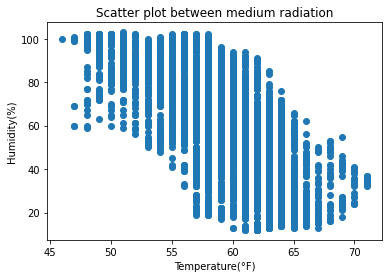

In [ ]:
# Make scatter plot of medium radiation
df_medium=df[df['Radiation'] > 575 ]
df_medium=df_medium[df_medium['Radiation'] <= 1000 ]
print(df_medium['Temperature'].median())
df_medium.info()
plt.scatter(df_medium['Temperature'],df_medium['Humidity'])
plt.title("Scatter plot between medium radiation")
plt.xlabel("Temperature(°F)")
plt.ylabel("Humidity(%)")
plt.show()

62.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 129 to 30428
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         657 non-null    object        
 1   Time         657 non-null    datetime64[ns]
 2   Radiation    657 non-null    float64       
 3   Temperature  657 non-null    int64         
 4   Humidity     657 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 30.8+ KB


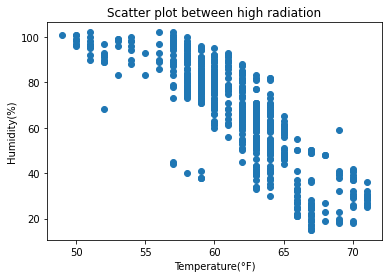

In [ ]:
# Make scatter plot of high radiation
df_high=df[df['Radiation'] > 1000 ]
print(df_high['Temperature'].median())
df_high.info()
plt.scatter(df_high['Temperature'],df_high['Humidity'])
plt.title("Scatter plot between high radiation")
plt.xlabel("Temperature(°F)")
plt.ylabel("Humidity(%)")
plt.show()

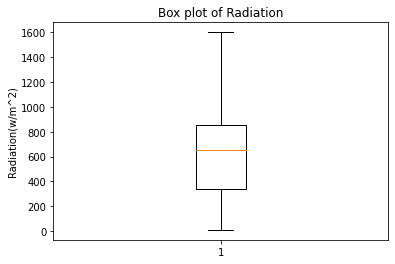

In [ ]:
# Make box plot of radiation
plt.boxplot(df['Radiation'])
plt.title("Box plot of Radiation")
plt.ylabel("Radiation(w/m^2)")
plt.show()

In [ ]:
# Clear outlier of radiation
rad_outlier = df[df['Radiation'] > 1635.125]
rad_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         0 non-null      object        
 1   Time         0 non-null      datetime64[ns]
 2   Radiation    0 non-null      float64       
 3   Temperature  0 non-null      int64         
 4   Humidity     0 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 0.0+ bytes


In [ ]:
# Clear outlier of radiation
rad_no_outlier = df[df['Radiation'] <= -444.195]
rad_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         0 non-null      object        
 1   Time         0 non-null      datetime64[ns]
 2   Radiation    0 non-null      float64       
 3   Temperature  0 non-null      int64         
 4   Humidity     0 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 0.0+ bytes


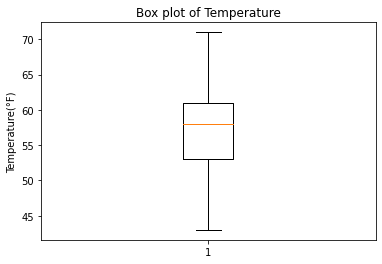

In [ ]:
# Make box plot of temperature
plt.boxplot(df['Temperature'])
plt.title("Box plot of Temperature")
plt.ylabel("Temperature(°F)")
plt.show()

In [ ]:
# Clear outlier of temperature
Temp_High_outlier = df[df['Temperature'] > 73]
Temp_High_outlier.info()
Temp_Low_outlier = df[df['Temperature'] < 41]
Temp_Low_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         0 non-null      object        
 1   Time         0 non-null      datetime64[ns]
 2   Radiation    0 non-null      float64       
 3   Temperature  0 non-null      int64         
 4   Humidity     0 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         0 non-null      object        
 1   Time         0 non-null      datetime64[ns]
 2   Radiation    0 non-null      float64       
 3   Temperature  0 non-null      int64         
 4   Humidity     0 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2

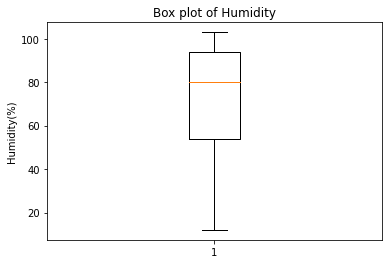

In [ ]:
# Make box plot of humidity
plt.boxplot(df['Humidity'])
plt.title("Box plot of Humidity")
plt.ylabel("Humidity(%)")
plt.show()

In [ ]:
# Clear outlier of humidity
Humi_High_outlier = df[df['Humidity'] > 144]
Humi_High_outlier.info()
Humi_Low_outlier = df[df['Humidity'] < 4]
Humi_Low_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         0 non-null      object        
 1   Time         0 non-null      datetime64[ns]
 2   Radiation    0 non-null      float64       
 3   Temperature  0 non-null      int64         
 4   Humidity     0 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         0 non-null      object        
 1   Time         0 non-null      datetime64[ns]
 2   Radiation    0 non-null      float64       
 3   Temperature  0 non-null      int64         
 4   Humidity     0 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2

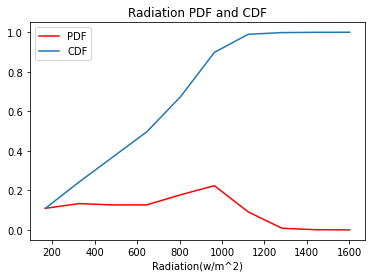

In [ ]:
# Create PDF and CDF of radiation 
count, bins_count = np.histogram(df['Radiation'], bins=10)

pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
# plt.ylabel('Y numbers')
plt.xlabel('Radiation(w/m^2)')
plt.title("Radiation PDF and CDF")
plt.legend()

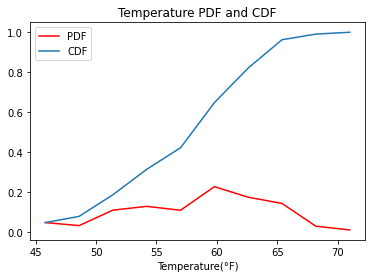

In [ ]:
# Create PDF and CDF of temperature 
count, bins_count = np.histogram(df['Temperature'], bins=10)

pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
# plt.ylabel('Y numbers')
plt.xlabel('Temperature(°F)')
plt.title("Temperature PDF and CDF")
plt.legend()

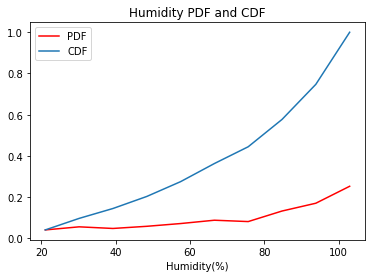

In [ ]:
# Create PDF and CDF of humidity 
import scipy.stats as stcount, bins_count = np.histogram(df['Humidity'], bins=10)

pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
# plt.ylabel('Y numbers')
plt.xlabel('Humidity(%)')
plt.title("Humidity PDF and CDF")
plt.legend()

In [ ]:
# find CL=90% of radiation by using all data
st.t.interval(alpha=0.90, df=len(df['Radiation'])-1, loc=np.mean(df['Radiation']), scale=st.sem(df['Radiation'])) 

(595.5161187606631, 605.774356827227)

In [ ]:
# find CL=95% of radiation by using all data
st.t.interval(alpha=0.95, df=len(df['Radiation'])-1, loc=np.mean(df['Radiation']), scale=st.sem(df['Radiation'])) 

(594.5333324398633, 606.7571431480268)

In [ ]:
# find CL=99% of radiation by using all data
st.t.interval(alpha=0.99, df=len(df['Radiation'])-1, loc=np.mean(df['Radiation']), scale=st.sem(df['Radiation'])) 

(592.6122408911763, 608.6782346967138)

In [ ]:
# Plot CL of radiation by using all data
data_dict = {}
data_dict['category'] = ['CL 0.9','CL 0.95','CL 0.99']
data_dict['lower'] = [595.5161187606631,594.5333324398633,592.6122408911763]
data_dict['upper'] = [605.774356827227,606.7571431480268,608.6782346967138]
dataset = pd.DataFrame(data_dict)

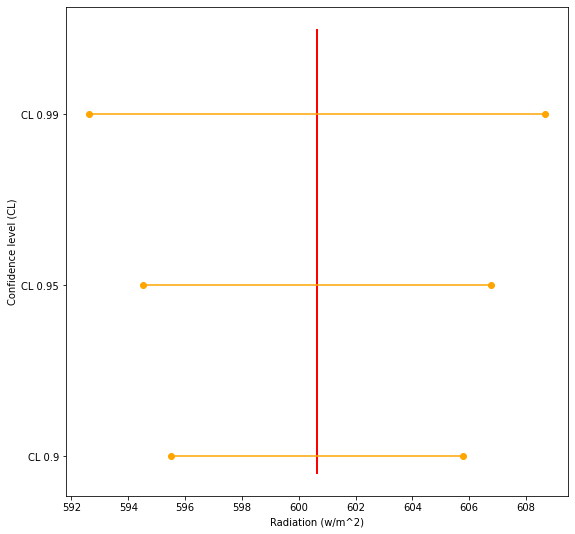

In [ ]:
plt.figure(figsize=(9,9))
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.xlabel('Radiation (w/m^2)')
    plt.ylabel('Confidence level (CL)')
plt.yticks(range(len(dataset)),list(dataset['category']))

plt.vlines(ymin=-0.1, ymax=2.5,
           x=600.645238, 
           linewidth=2.0,
           color="red");

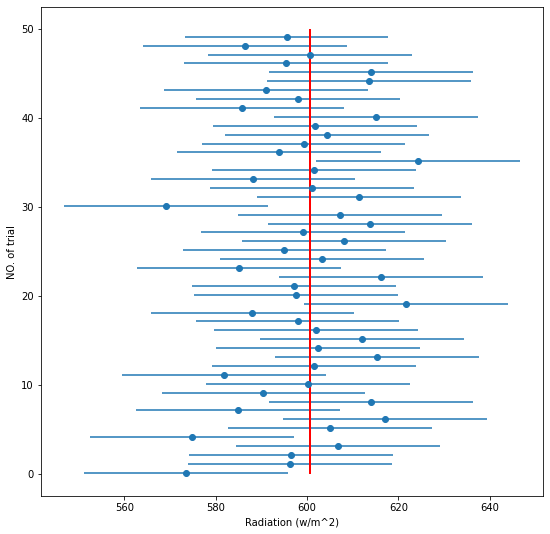

In [192]:
# Random and plot CI=90% of radiation by using sample data
np.random.seed(12345)

sample_size = 500

intervals = []
sample_means = []

for sample in range(50):
    sample = np.random.choice(a= df['Radiation'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = st.norm.ppf(q = 0.95)  # Get the z-critical value*   
                                  
   
    pop_stdev = df['Radiation'].std()  # Get the population standard deviation

    st.norm.ppf(q = 0.05)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

plt.figure(figsize=(9,9))
plt.ylabel('NO. of trial')
plt.xlabel('Radiation (w/m^2)')
plt.errorbar(y=np.arange(0.1, 50, 1), 
             x=sample_means, 
             xerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.vlines(ymin=0, ymax=50,
           x=600.645238, 
           linewidth=2.0,
           color="red");



In [ ]:
print(confidence_interval)

(573.1825636743193, 617.8527963256805)


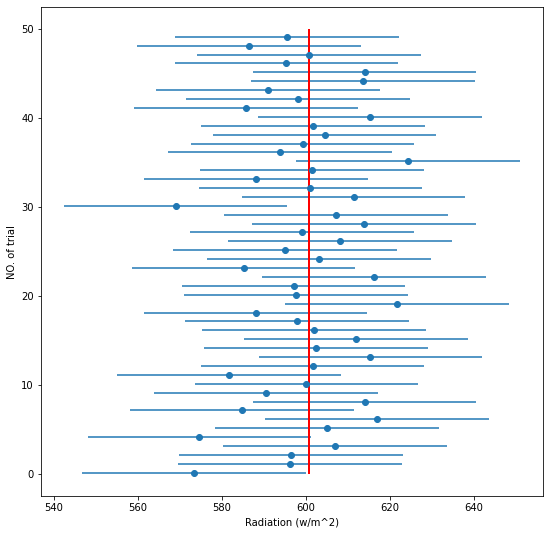

In [193]:
# Random and plot CI=95% of radiation by using sample data
np.random.seed(12345)

sample_size = 500

intervals = []
sample_means = []

for sample in range(50):
    sample = np.random.choice(a= df['Radiation'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = st.norm.ppf(q = 0.975)  # Get the z-critical value*   
                                  
   
    pop_stdev = df['Radiation'].std()  # Get the population standard deviation

    st.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

plt.figure(figsize=(9,9))
plt.ylabel('NO. of trial')
plt.xlabel('Radiation (w/m^2)')
plt.errorbar(y=np.arange(0.1, 50, 1), 
             x=sample_means, 
             xerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.vlines(ymin=0, ymax=50,
           x=600.645238, 
           linewidth=2.0,
           color="red");

In [ ]:
print(confidence_interval)

(568.9037473852298, 622.13161261477)


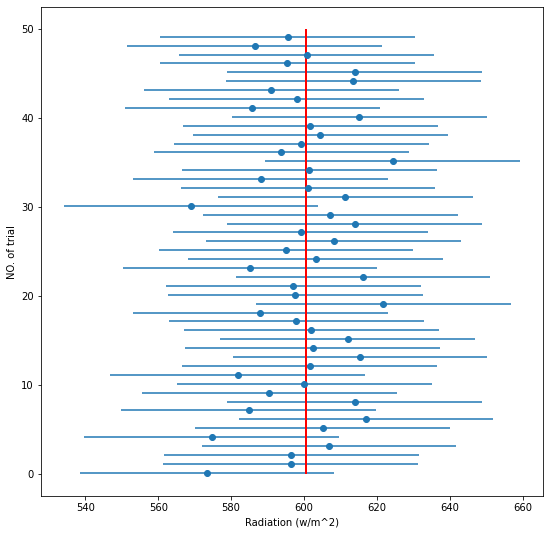

In [194]:
# Random and plot CI=99% of radiation by using sample data
np.random.seed(12345)

sample_size = 500

intervals = []
sample_means = []

for sample in range(50):
    sample = np.random.choice(a= df['Radiation'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = st.norm.ppf(q = 0.995)  # Get the z-critical value*   
                                  
   
    pop_stdev = df['Radiation'].std()  # Get the population standard deviation

    st.norm.ppf(q = 0.005)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

plt.figure(figsize=(9,9))
plt.ylabel('NO. of trial')
plt.xlabel('Radiation (w/m^2)')
plt.errorbar(y=np.arange(0.1, 50, 1), 
             x=sample_means, 
             xerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.vlines(ymin=0, ymax=50,
           x=600.645238, 
           linewidth=2.0,
           color="red");

In [ ]:
print(confidence_interval)

(560.5410436676299, 630.49431633237)


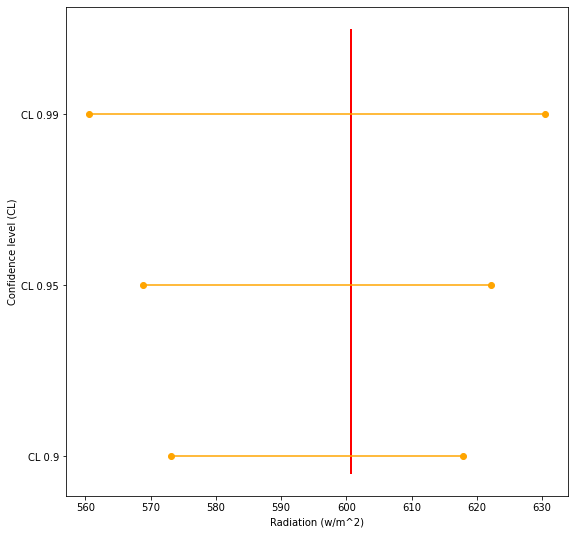

In [ ]:
# Random and plot CL of radiation by using sample data
data_dict = {}
data_dict['category'] = ['CL 0.9','CL 0.95','CL 0.99']
data_dict['lower'] = [573.1825636743193,568.9037473852298,560.5410436676299]
data_dict['upper'] = [ 617.8527963256805, 622.13161261477,630.49431633237]  
dataset = pd.DataFrame(data_dict)

plt.figure(figsize=(9,9))
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.xlabel('Radiation (w/m^2)')
    plt.ylabel('Confidence level (CL)')
plt.yticks(range(len(dataset)),list(dataset['category']))

plt.vlines(ymin=-0.1, ymax=2.5,
           x=600.645238, 
           linewidth=2.0,
           color="red");

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [ ]:
# Make linear regression equation by random and train data using temperature compare with radiation
x = df[['Temperature']]
y = df['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 

print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain is :',R_square)

y-intercept:  -1194.3123562319165
slope: [31.48617032]
R square obtain is : 0.34629513210869345


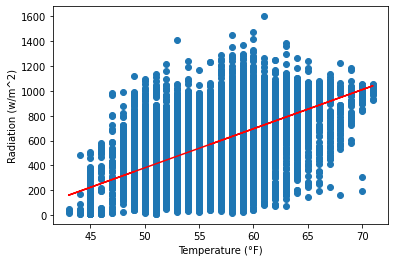

In [ ]:
# Plot linear equation with scatter plot
plt.scatter(df[['Temperature']],y)
m = lm.coef_
c = lm.intercept_
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Temperature (°F)')
equation = m*x_Train + c
plt.plot(x_Train,equation,'-r')

In [ ]:
# Make linear regression equation by randomly split data into train and test data using humidity compare with radiation at the morning
x = df[['Humidity']]
y = df['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 

print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain is :',R_square)

y-intercept:  1062.358095122576
slope: [-6.35423648]
R square obtain is : 0.2499722541771121


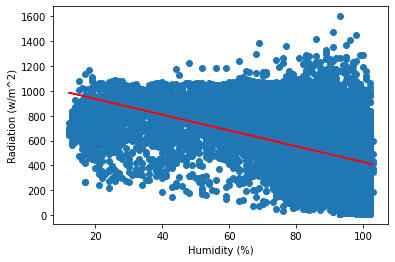

In [ ]:
# Plot linear equation with scatter plot
plt.scatter(df[['Humidity']],y)
m = lm.coef_
c = lm.intercept_
equation = m*x_Train + c
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Humidity (%)')
plt.plot(x_Train,equation,'-r')

y-intercept:  929.425581513911
slope: [-4.47811263]
R square obtain for normal equation method is : 0.2457065624783099


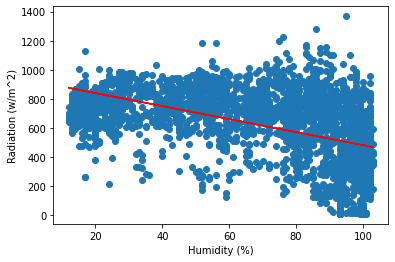

In [ ]:
# Make linear regression equation by randomly split data into train and test data using humidity compare with radiation at the morning and plot
df_Morn = df.loc[((df['Time'].dt.time >= time(9,00)) & (df['Time'].dt.time < time(11,00)))]
x = df_Morn[['Humidity']]
y = df_Morn['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 
print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

plt.scatter(df_Morn[['Humidity']],y)
m = lm.coef_
c = lm.intercept_
equation = m*x_Train + c
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Humidity (%)')
plt.plot(x_Train,equation,'-r')

y-intercept:  -1119.3892568594752
slope: [30.88218586]
R square obtain for normal equation method is : 0.44863366615525824


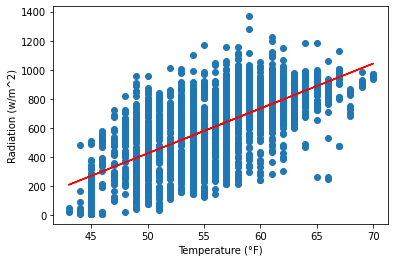

In [ ]:
# Make linear regression equation by randomly split data into train and test data using temperature compare with radiation at the noon and plot
df_Morn = df.loc[((df['Time'].dt.time >= time(9,00)) & (df['Time'].dt.time < time(11,00)))]
x = df_Morn[['Temperature']]
y = df_Morn['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 
print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

plt.scatter(df_Morn[['Temperature']],y)
m = lm.coef_
c = lm.intercept_
equation = m*x_Train + c
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Temperature (°F)')
plt.plot(x_Train,equation,'-r')

y-intercept:  1173.342413694265
slope: [-6.44073546]
R square obtain for normal equation method is : 0.22935224601206539


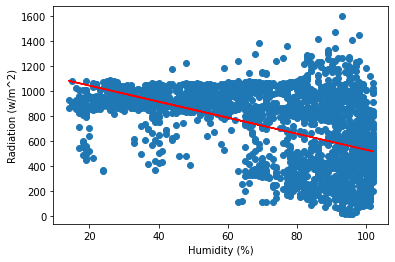

In [ ]:
# Make linear regression equation by randomly split data into train and test data using humidity compare with radiation at the noon and plot
df_Noon = df.loc[((df['Time'].dt.time >= time(11,00)) & (df['Time'].dt.time < time(13,00)))]
x = df_Noon[['Humidity']]
y = df_Noon['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 
print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

plt.scatter(df_Noon[['Humidity']],y)
m = lm.coef_
c = lm.intercept_
equation = m*x_Train + c
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Humidity (%)')
plt.plot(x_Train,equation,'-r')

y-intercept:  -1138.363234196263
slope: [32.15276646]
R square obtain for normal equation method is : 0.3200178527257028


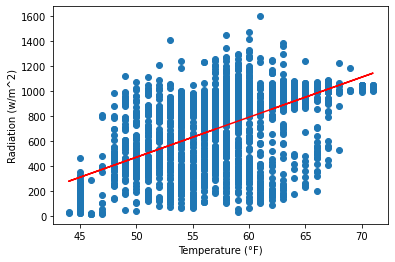

In [ ]:
# Make linear regression equation by randomly split data into train and test data using temperature compare with radiation at the noon and plot
df_Noon = df.loc[((df['Time'].dt.time >= time(11,00)) & (df['Time'].dt.time < time(13,00)))]
x = df_Noon[['Temperature']]
y = df_Noon['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 
print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

plt.scatter(df_Noon[['Temperature']],y)
m = lm.coef_
c = lm.intercept_
equation = m*x_Train + c
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Temperature (°F)')
plt.plot(x_Train,equation,'-r')

y-intercept:  1061.0878022623447
slope: [-7.27329884]
R square obtain for normal equation method is : 0.3055773294128893


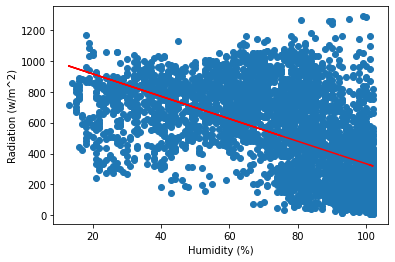

In [ ]:
# Make linear regression equation by randomly split data into train and test data using humidity compare with radiation at the evening and plot
df_Eve = df.loc[((df['Time'].dt.time >= time(13,00)) & (df['Time'].dt.time < time(16,00)))]
x = df_Eve[['Humidity']]
y = df_Eve['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 
print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

plt.scatter(df_Eve[['Humidity']],y)
m = lm.coef_
c = lm.intercept_
equation = m*x_Train + c
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Humidity (%)')
plt.plot(x_Train,equation,'-r')

y-intercept:  -1288.1465845985706
slope: [31.53442382]
R square obtain for normal equation method is : 0.33453226383721923


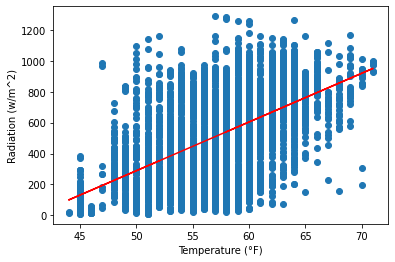

In [ ]:
# Make linear regression equation by randomly split data into train and test data using temperature compare with radiation at the evening and plot
df_Eve = df.loc[((df['Time'].dt.time >= time(13,00)) & (df['Time'].dt.time < time(16,00)))]
x = df_Eve[['Temperature']]
y = df_Eve['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 
print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

plt.scatter(df_Eve[['Temperature']],y)
m = lm.coef_
c = lm.intercept_
equation = m*x_Train + c
plt.ylabel('Radiation (w/m^2)')
plt.xlabel('Temperature (°F)')
plt.plot(x_Train,equation,'-r')

In [ ]:
# Make linear regression equation by randomly split data into train and test data using temperature and humidity compare with radiation at the evening
x = df[['Temperature','Humidity']]
y = df['Radiation']

x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,test_size = 0.2)

lm = LinearRegression() 
lm.fit(x_Train,y_Train) 

print('y-intercept: ',lm.intercept_)
print('slope:', lm.coef_)

predictions = lm.predict(x_Test)

sse = np.sum((predictions - y_Test)**2)
sst = np.sum((y_Test - y_Test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

y-intercept:  -526.5925217739126
slope: [23.18533282 -2.69443706]
R square obtain for normal equation method is : 0.369858110133622
